In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.forecasting.theta import ThetaModel
import sklearn.metrics as skmetrics 
import warnings                               
warnings.filterwarnings('ignore')

In [135]:
df = pd.read_csv('train.csv', header=0, index_col=0, parse_dates=True)
df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Datetime,,,,,,,,,,,,,,,,,,,
2018-01-01 06:20:00+00:00,26.212347,28.696304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.00,3.976499,NaN,NaN,252.00,3.042750
2018-01-01 06:40:00+00:00,59.632658,29.052567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,11.091660,NaN,NaN,255.00,3.424814
2018-01-01 06:50:00+00:00,40.889650,28.984758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.75,4.234497,NaN,NaN,264.75,3.507172
2018-01-01 10:40:00+00:00,34.398111,30.282058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.75,5.347792,NaN,NaN,283.75,3.442212
2018-01-01 12:00:00+00:00,29.797653,29.333519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.00,6.022326,NaN,NaN,274.00,3.031363


In [136]:
y = df.iloc[:,:1]

In [137]:
y.index = pd.to_datetime(y.index)

daily_mean = y.resample('D').mean()

daily_mean

,ActivePower
Datetime,
2018-01-01 00:00:00+00:00,366.223561
2018-01-02 00:00:00+00:00,462.550740
2018-01-03 00:00:00+00:00,454.417752
2018-01-04 00:00:00+00:00,369.952190
2018-01-05 00:00:00+00:00,319.446595
...,...
2020-03-11 00:00:00+00:00,466.289248
2020-03-12 00:00:00+00:00,570.315539
2020-03-13 00:00:00+00:00,619.637333


In [138]:
train, test = daily_mean[0:-15], daily_mean[-15:]

In [139]:
np.sum(train.isna())

ActivePower    71
dtype: int64

In [140]:
# train = train.fillna((train.ffill() + train.bfill()) / 2)
# best rmse 181 for theta only

In [141]:
#train = train.fillna(train.ffill())
# best rmse 181 for est and theta

In [142]:
train = train.fillna(train.bfill())
# best 177

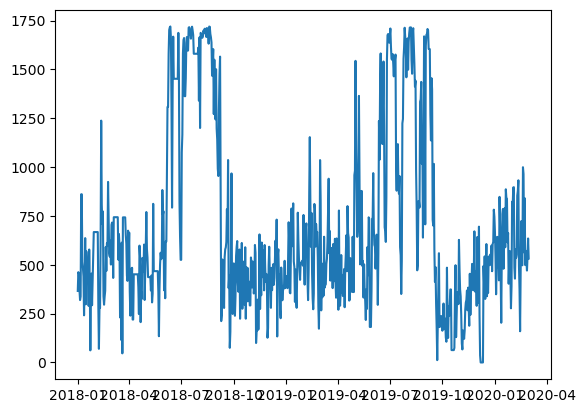

In [143]:
plt.plot(train)

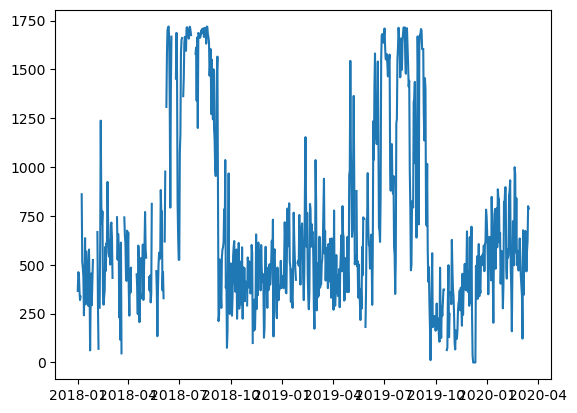

In [144]:
plt.plot(daily_mean)

### ETS

In [145]:
# Holt-Winters ETS
model_1 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped_trend=False).fit()
model_2 = ExponentialSmoothing(train, trend=None, seasonal="add", seasonal_periods=365, damped_trend=False).fit()
model_3 = ExponentialSmoothing(train, trend=None, seasonal="add", seasonal_periods=12, damped_trend=False).fit()
model_4 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=365, damped_trend=False).fit()

In [146]:
pred_1 = pd.DataFrame(model_1.forecast(len(test)))
pred_2 = pd.DataFrame(model_2.forecast(len(test)))
pred_3 = pd.DataFrame(model_3.forecast(len(test)))
pred_4 = pd.DataFrame(model_4.forecast(len(test)))

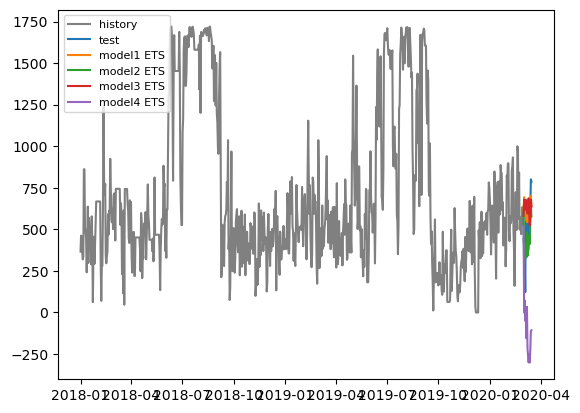

In [147]:
plt.plot(train, label='history', color='grey')
plt.plot(test, label='test')
plt.plot(pred_1, label='model1 ETS')
plt.plot(pred_2, label='model2 ETS')
plt.plot(pred_3, label='model3 ETS')
plt.plot(pred_4, label='model4 ETS')
plt.legend(loc='upper left', fontsize=8)
plt.show()

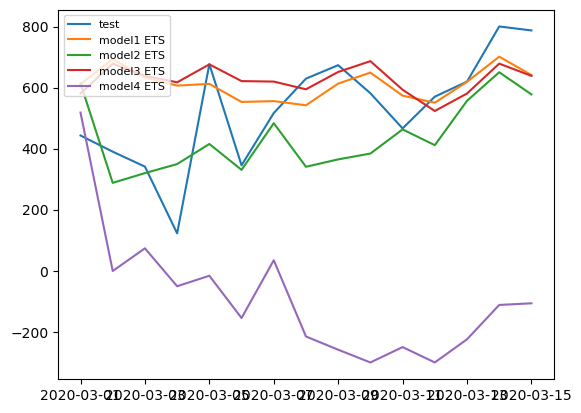

In [148]:
plt.plot(test, label='test')
plt.plot(pred_1, label='model1 ETS')
plt.plot(pred_2, label='model2 ETS')
plt.plot(pred_3, label='model3 ETS')
plt.plot(pred_4, label='model4 ETS')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [149]:
rmse_test = np.sqrt(skmetrics.mean_squared_error(test, pred_1))
rmse_test

191.12841607067628

In [150]:
rmse_test = np.sqrt(skmetrics.mean_squared_error(test, pred_2))
rmse_test

177.93834032431923

In [151]:
rmse_test = np.sqrt(skmetrics.mean_squared_error(test, pred_3))
rmse_test

198.64641526587758

In [152]:
rmse_test = np.sqrt(skmetrics.mean_squared_error(test, pred_4))
rmse_test

692.9873665834114

### Theta Model

In [153]:
#Now let's try some Theta models
theta = ThetaModel(train)
res = theta.fit()
pred = res.forecast(len(test))

In [154]:
pred_5 = pd.DataFrame(pred.values, index=test.index)

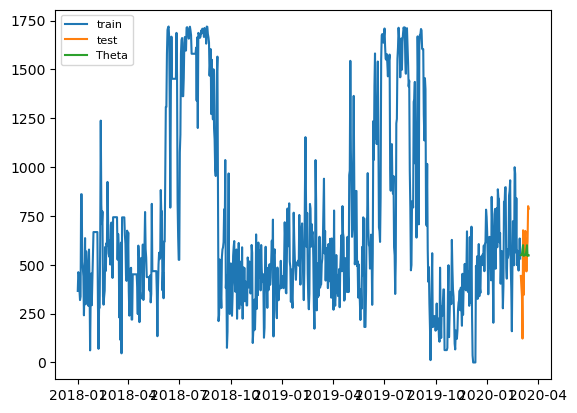

In [155]:
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(pred_5, label='Theta')
plt.legend(loc='upper left', fontsize=8)
plt.show()

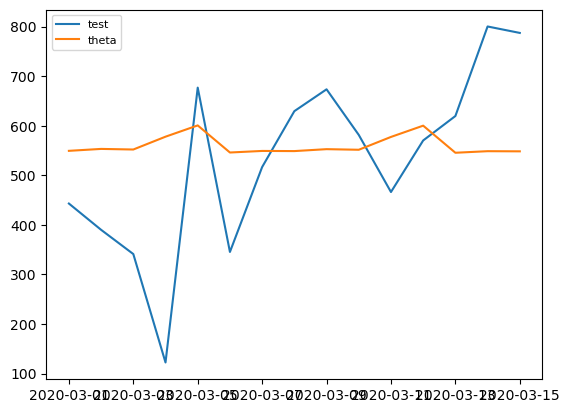

In [156]:
plt.plot(test, label='test')
plt.plot(pred_5, label='theta')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [157]:
rmse_test = np.sqrt(skmetrics.mean_squared_error(test, pred_5))
rmse_test

182.25260037220008

### Prophet

In [158]:
from prophet import Prophet

In [159]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(train.index)
df['y'] = train['ActivePower'].values
df

,ds,y
0,2018-01-01 00:00:00+00:00,366.223561
1,2018-01-02 00:00:00+00:00,462.550740
2,2018-01-03 00:00:00+00:00,454.417752
3,2018-01-04 00:00:00+00:00,369.952190
4,2018-01-05 00:00:00+00:00,319.446595
...,...,...
785,2020-02-25 00:00:00+00:00,516.014263
786,2020-02-26 00:00:00+00:00,470.661244
787,2020-02-27 00:00:00+00:00,541.003574
788,2020-02-28 00:00:00+00:00,634.866140


In [160]:
df['ds'] = df['ds'].dt.tz_localize(None)

In [161]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)
forecast

14:04:24 - cmdstanpy - INFO - Chain [1] start processing
14:04:24 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,697.018516,192.389874,814.250865,697.018516,697.018516,-183.446406,-183.446406,-183.446406,-9.083405,-9.083405,-9.083405,-174.363002,-174.363002,-174.363002,0.0,0.0,0.0,513.572109
1,2018-01-02,697.223115,211.949104,841.329952,697.223115,697.223115,-178.563573,-178.563573,-178.563573,-9.016257,-9.016257,-9.016257,-169.547315,-169.547315,-169.547315,0.0,0.0,0.0,518.659543
2,2018-01-03,697.427715,226.619883,863.891526,697.427715,697.427715,-148.965200,-148.965200,-148.965200,16.843099,16.843099,16.843099,-165.808299,-165.808299,-165.808299,0.0,0.0,0.0,548.462514
3,2018-01-04,697.632314,254.835224,892.003376,697.632314,697.632314,-124.133350,-124.133350,-124.133350,38.994821,38.994821,38.994821,-163.128171,-163.128171,-163.128171,0.0,0.0,0.0,573.498964
4,2018-01-05,697.836914,210.889718,829.458765,697.836914,697.836914,-175.539931,-175.539931,-175.539931,-14.075630,-14.075630,-14.075630,-161.464300,-161.464300,-161.464300,0.0,0.0,0.0,522.296983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,2020-03-11,685.035232,272.091651,915.924118,685.016740,685.055761,-111.299260,-111.299260,-111.299260,16.843099,16.843099,16.843099,-128.142358,-128.142358,-128.142358,0.0,0.0,0.0,573.735972
801,2020-03-12,684.953711,293.673474,909.442517,684.928707,684.983756,-87.751976,-87.751976,-87.751976,38.994821,38.994821,38.994821,-126.746797,-126.746797,-126.746797,0.0,0.0,0.0,597.201735
802,2020-03-13,684.872190,220.794780,851.780480,684.838791,684.908419,-139.850460,-139.850460,-139.850460,-14.075630,-14.075630,-14.075630,-125.774830,-125.774830,-125.774830,0.0,0.0,0.0,545.021730
803,2020-03-14,684.790669,236.051278,880.388488,684.746928,684.837771,-137.072480,-137.072480,-137.072480,-11.726404,-11.726404,-11.726404,-125.346076,-125.346076,-125.346076,0.0,0.0,0.0,547.718188


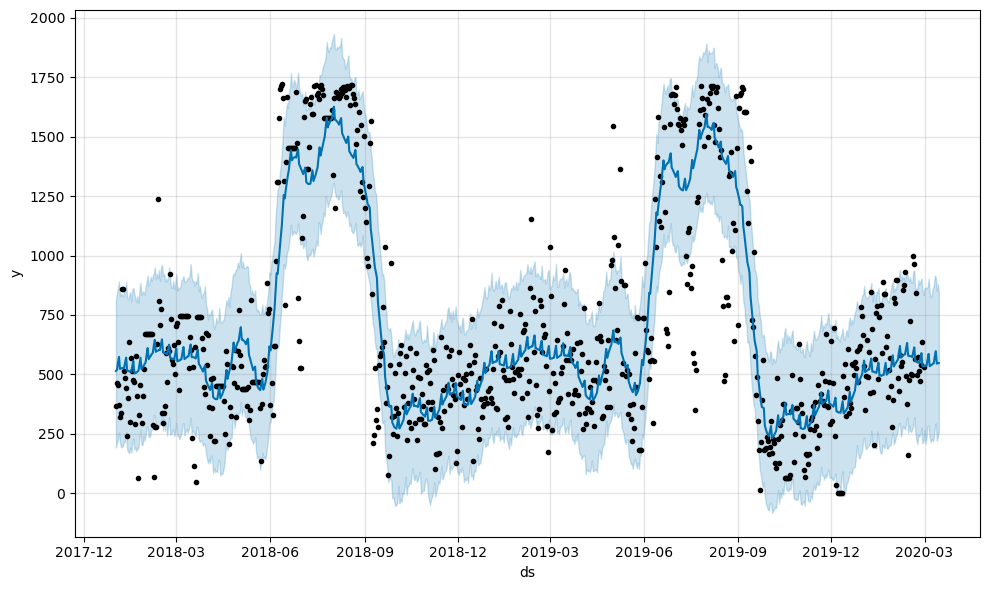

In [162]:
fig1 = m.plot(forecast)

In [163]:
prediction = forecast.iloc[-15:, -1]
prediction

790    533.779821
791    536.198699
792    536.348218
793    562.769180
794    585.907402
795    534.177829
796    538.137126
797    539.708589
798    544.405347
799    546.262482
800    573.735972
801    597.201735
802    545.021730
803    547.718188
804    547.199787
Name: yhat, dtype: float64

In [164]:
rmse_test = np.sqrt(skmetrics.mean_squared_error(test, prediction))
rmse_test

177.25987834779414

# Fit final model

In [165]:
np.sum(daily_mean.isna())

ActivePower    71
dtype: int64

In [166]:
daily_mean = daily_mean.fillna(daily_mean.bfill())

In [167]:
daily_mean

,ActivePower
Datetime,
2018-01-01 00:00:00+00:00,366.223561
2018-01-02 00:00:00+00:00,462.550740
2018-01-03 00:00:00+00:00,454.417752
2018-01-04 00:00:00+00:00,369.952190
2018-01-05 00:00:00+00:00,319.446595
...,...
2020-03-11 00:00:00+00:00,466.289248
2020-03-12 00:00:00+00:00,570.315539
2020-03-13 00:00:00+00:00,619.637333


In [168]:
model_final = ExponentialSmoothing(daily_mean, trend=None, seasonal="add", seasonal_periods=365, damped_trend=False).fit()
pred_final = pd.DataFrame(model_final.forecast(len(test)))
pred_final

,0
2020-03-16 00:00:00+00:00,718.401360
2020-03-17 00:00:00+00:00,553.042068
2020-03-18 00:00:00+00:00,664.969718
2020-03-19 00:00:00+00:00,415.566621
2020-03-20 00:00:00+00:00,734.430634
2020-03-21 00:00:00+00:00,679.352203
2020-03-22 00:00:00+00:00,562.594991
2020-03-23 00:00:00+00:00,658.078862
2020-03-24 00:00:00+00:00,561.303134
2020-03-25 00:00:00+00:00,539.800132


In [169]:

pred_final.reset_index(inplace=True)
pred_final.columns = ['Date', 'Forecasting']
pred_final['Date'] = pred_final['Date'].dt.tz_localize(None)

In [171]:
pred_final

,Date,Forecasting
0,2020-03-16,718.401360
1,2020-03-17,553.042068
2,2020-03-18,664.969718
3,2020-03-19,415.566621
4,2020-03-20,734.430634
5,2020-03-21,679.352203
6,2020-03-22,562.594991
7,2020-03-23,658.078862
8,2020-03-24,561.303134
9,2020-03-25,539.800132


In [170]:
pred_final.to_csv("test_forecast.csv",index=False)